In [1]:
import pandas as pd
df = pd.read_feather('datasets/tempodist.feather') #convertido de .rdata (R)

#Exemplo no livro Manual de Análise de Dados, de Fávero

In [3]:
df

,tempo,distancia
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


Text(0.5, 1.0, 'toy problem: regressão linear simples')

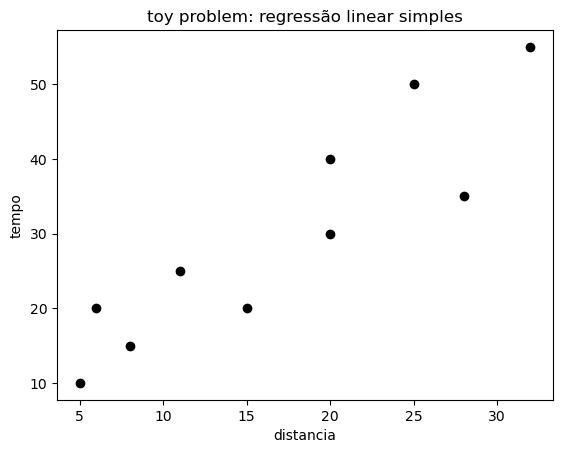

In [2]:
import matplotlib.pyplot as plt
plt.plot(df['distancia'],df['tempo'], 'ko')
plt.xlabel('distancia')
plt.ylabel('tempo')
plt.title('toy problem: regressão linear simples')

$\hat{tempo} = \beta_0 + \beta_1 \times \text{distancia} \equiv \hat{y} = \beta_0 + \beta_1 x_1$
#### Qual a melhor RETA para predizer valores? A que minimiza o quadrado das distâncias entre observados e preditos

In [3]:
y = df['tempo']
X = df['distancia'].to_numpy()

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X.reshape(-1,1), y)

LinearRegression()

In [4]:
print(model.coef_)
print(model.intercept_)

[1.41891892]
5.878378378378375


Text(0.5, 1.0, 'toy problem: $5.878 + 1.420x_1$')

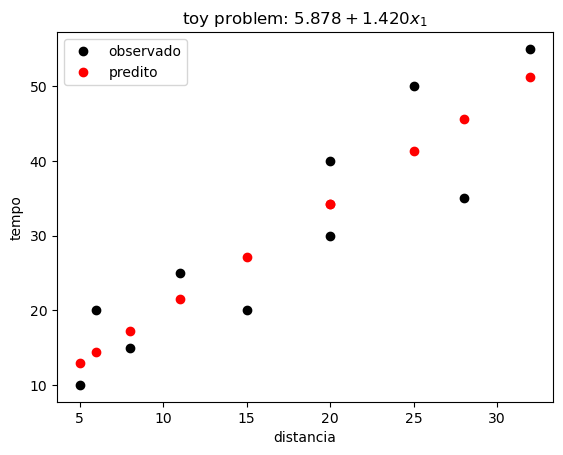

In [5]:
yhat = model.predict(X.reshape(-1,1))

plt.plot(df['distancia'],df['tempo'], 'ko', label='observado')
plt.plot(X, yhat, 'ro', label='predito')
plt.legend()
plt.xlabel('distancia')
plt.ylabel('tempo')
plt.title('toy problem: $5.878 + 1.420x_1$')


$\hat{y}=5.878 + 1.420 x_1$

In [ ]:
#!python -m pip install --upgrade scikit-learn
#!conda update scikit-learn

^C


In [6]:
from sklearn.metrics import r2_score, mean_absolute_error

print(f'r2: {r2_score(y, yhat)}, mae: {mean_absolute_error(y, yhat)}')

r2: 0.8194256756756757, mae: 5.445945945945946


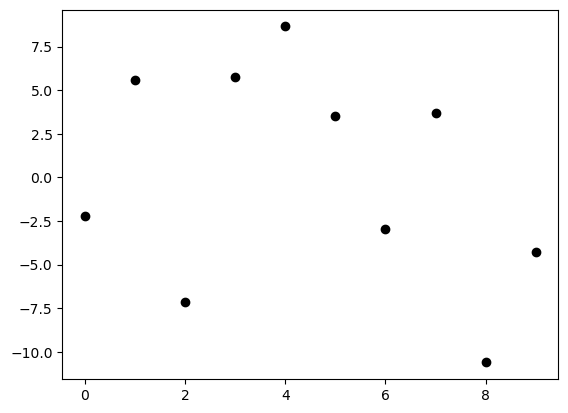

In [37]:
residuos = y-yhat
plt.plot(residuos,'ko')

In [39]:
from scipy import stats
res = stats.normaltest(residuos)
res.statistic
res.pvalue

c:\Users\josen\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0.6017014504507645

#### Resolvendo a Regressão com a Equação Normal

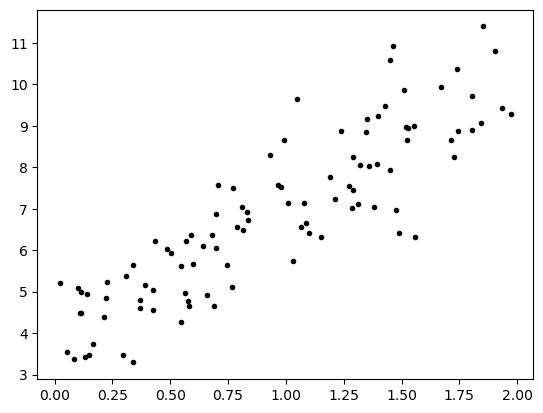

In [9]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) # este termo no final equivale ao epslon, ao ruído gaussiano

plt.plot(X,y, 'k.')

In [14]:
X_b = np.c_[np.ones((100,1)), X] # adiciona x0 = 1 em cada instância (bias)
model_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
model_normal

array([[3.86796498],
       [3.16799658]])

#### Devido ao ruído não recupera os pesos da função original. Fazendo a predição com W_best

In [16]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(model_normal)
y_predict

array([[ 3.86796498],
       [10.20395815]])

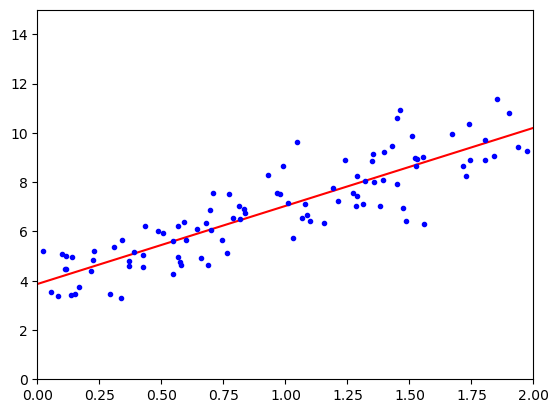

In [17]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, 'b.')
plt.axis([0,2,0,15])
plt.show()

#### Agora com SKLEARN LinearRegression (técnica SVD)

In [18]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X,y)
model_lr.intercept_, model_lr.coef_

(array([3.86796498]), array([[3.16799658]]))

In [19]:
model_lr.predict(X_new)

array([[ 3.86796498],
       [10.20395815]])

#### Agora com Gradiente Descendente em Lote (batch)

In [ ]:
eta = 0.1 #taxa de aprendizado (learning rate)
epochs = 1000 #iterações
m = 100 #instâncias (observações, linhas do dataset)

w = np.random.randn(2,1) #inicializando pesos w_0 e w_1 aleatoriamente com distribuição normal

for epoch in range(epochs): #itera 1000 vezes por todo o conjunto de treinamento
    gradients = 2/m * X_b.T.dot(X_b.dot(w) - y)
    w = w - eta * gradients

In [21]:
w

array([[3.86796498],
       [3.16799658]])

#### TAREFA: Para as taxas de aprendizagem = 0.02, 0.1, 0.5, obter o gráfico da reta dada pelo w_0 e w_1 a cada 100 épocas de treinamento e plotar todas estas retas em apenas uma janela, para cada taxa de aprendizagem. Considere Pesquisar o comando subplots de matplotlib para exibir as três janelas horizontalmente lado a lado. Por fim analise o efeito da taxa de aprendizagem escrevendo no markdown

#### Gradiente Estocástico com cronograma de aprendizado

In [ ]:
epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

w = np.random.randn(2,1) #inicializando pesos w_0 e w_1 aleatoriamente com distribuição normal

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2/m * xi.T.dot(xi.dot(w) - yi)
        eta = learning_schedule(epoch*m + i)
